# DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT SPARKS FOUNDATION #GRIPJULY21

# TASK-3: EXPLORATORY DATA ANALYSIS-RETAIL

## AUTHOR : HASHMEET KAUR

#### AS A BUSINESS MANAGER, TRY TO FIND OUT THE WEAK AREAS WHERE YOU CAN WORK TO MAKE MORE PROFIT
#### WHAT ALL BUSINESS PROBLEMS YOU CAN DERIVE BY EXPLORING THE DATA

## Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as ps
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Data Extraction 

In [2]:
#Reading the data
df= pd.read_csv("SampleSuperstore.csv")
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

## Data Cleaning

In [3]:
#Check the null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No Null values

In [4]:
#Drop the unnecessary columns
df=df.drop("Postal Code",axis=1)
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount    Profit  
0  South        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1  South        Furniture       Chairs  731.9400         3      0.00  219.5820  
2   West  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3  South        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  South  Office Supplies      Storage   22.3680         2      0.20    2.5164

## Data Preprocessing

In [5]:
#Study the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [6]:
#Shape of the data
df.shape

(9994, 12)

In [7]:
#Summary Statistics
df.describe()

Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000

<AxesSubplot:>

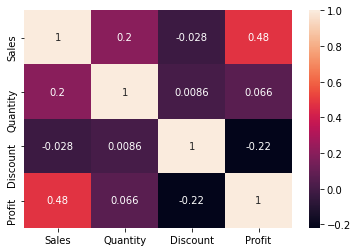

In [8]:
#Correlation between the columns
sns.heatmap(df.corr(),annot=True)

* Discount and Profit,Discount and Sales are negatively Correlated.
* Sales and profit are netrually correlated

In [9]:
#Unique values in Category
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
#Unique values in Region
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
#Unique values in Segment
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
#Unique values in Ship Mode
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

## EXPLORATORY DATA ANALYSIS

## 1) ANALYSIS OF SALES/ PROFIT/ DISCOUNT "REGION" WISE

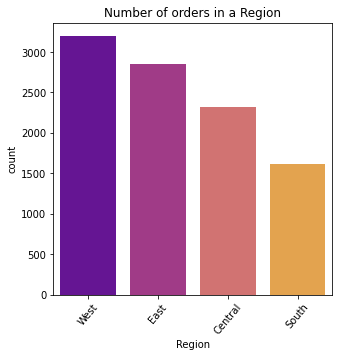

In [13]:
#Number of orders in a region
fig =plt.subplots(figsize=(5,5))
sns.set_style="darkgrid"
sns.countplot(df["Region"], order=df["Region"].value_counts().index,palette="plasma")
plt.xticks(rotation=50)
plt.title("Number of orders in a Region")
plt.show()

Maximum orders are from west region.

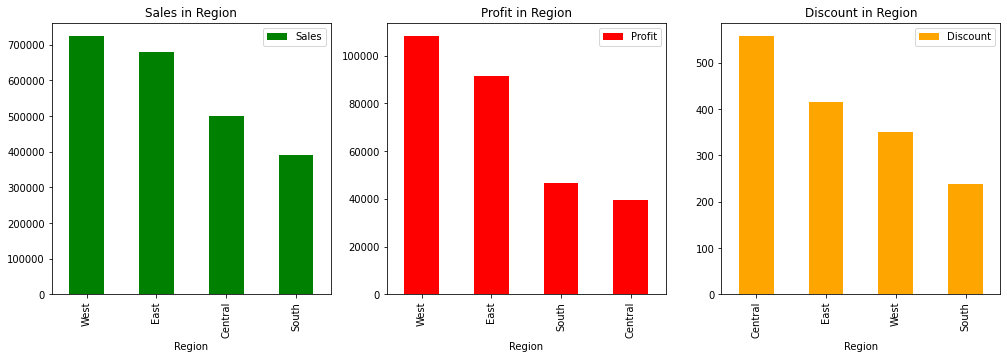

In [14]:
#Sales/ Profit/ Discount in Region
fig, ax =plt.subplots(1,3,figsize=(17,5))

cat=df.groupby("Region")[["Sales"]].sum()
cat.sort_values("Sales",ascending=False,inplace=True)
cat.plot(kind="bar",color=["Green"],ax=ax[0])
ax[0].set_title("Sales in Region")

cat=df.groupby("Region")[["Profit"]].sum()
cat.sort_values("Profit",ascending=False,inplace=True)
cat.plot(kind="bar",color=["Red"],ax=ax[1])
ax[1].set_title("Profit in Region")

cat=df.groupby("Region")[["Discount"]].sum()
cat.sort_values("Discount",ascending=False,inplace=True)
cat.plot(kind="bar",color=["Orange"],ax=ax[2])
ax[2].set_title("Discount in Region")

plt.show()

* Though the Sales is Western region is high
* The Profits are highest in Western region Because of low Discounts
* Central region has highest discount, probably the reason for lowest profits

## 2) ANALYSIS OF SALES/ PROFIT/ DISCOUNT "SEGMENT" WISE

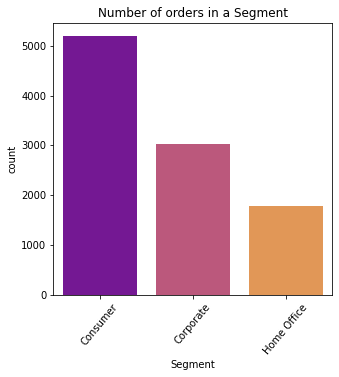

In [15]:
#Number of orders in segment
fig =plt.subplots(figsize=(5,5))
sns.set_style="darkgrid"
sns.countplot(df["Segment"], order=df["Segment"].value_counts().index, palette="plasma")
plt.xticks(rotation=50)
plt.title("Number of orders in a Segment")
plt.show()

Maximum orders are from Consumer segment.

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

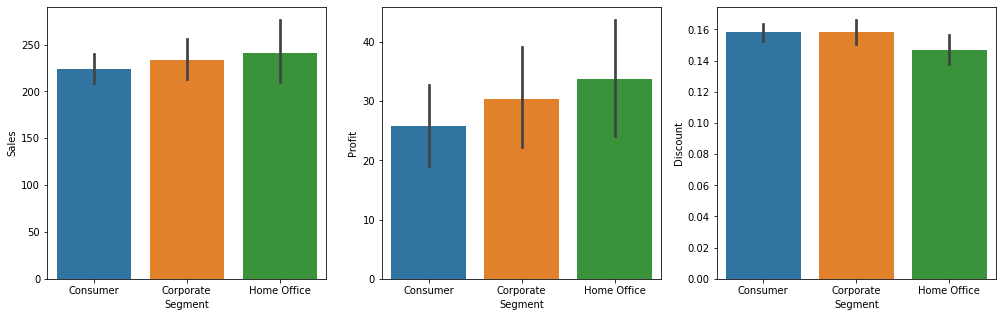

In [16]:
#Sales/ Profit/ Discount in Segment
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Segment', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Segment', y='Discount', data = df,ax=ax[2])

* We can observe that both sales and profit of "Home Office" segment is highest but have less discounts.
* Having high discounts in consumer segment , it has low profits

## 3) ANALYSIS OF SALES/ PROFIT/ DISCOUNT IN SHIP MODE

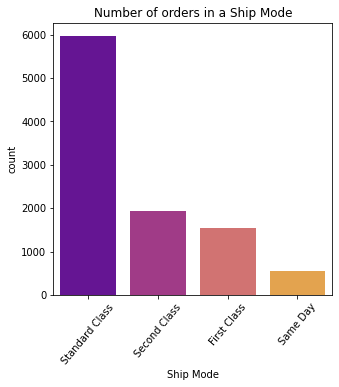

In [17]:
#Number of orders in Ship Mode
fig =plt.subplots(figsize=(5,5))
sns.set_style="darkgrid"
sns.countplot(df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="plasma")
plt.xticks(rotation=50)
plt.title("Number of orders in a Ship Mode")
plt.show()

Maximum orders are from Standard Class

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

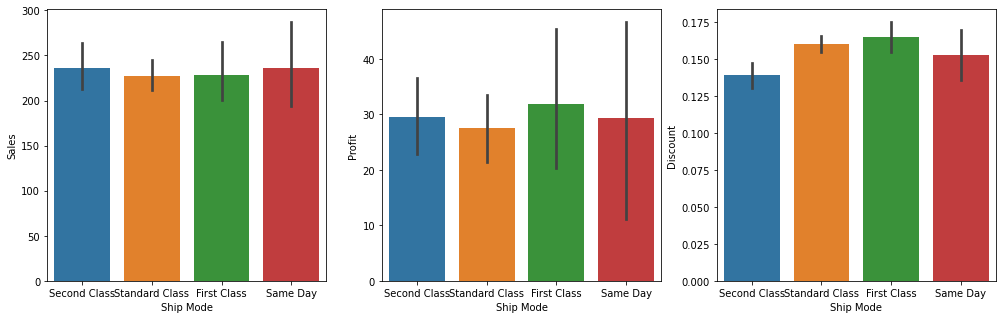

In [18]:
#Sales/ Profit/ Discount in Ship Mode

fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Ship Mode', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = df,ax=ax[2])

* Most sales are in where shipping is carried on Same day.
* Due to high discounts in first class , it has Maximum profits.

## 4) ANALYSIS OF SALES/ PROFIT/ DISCOUNT IN A REGION, "CATEGORY" WISE

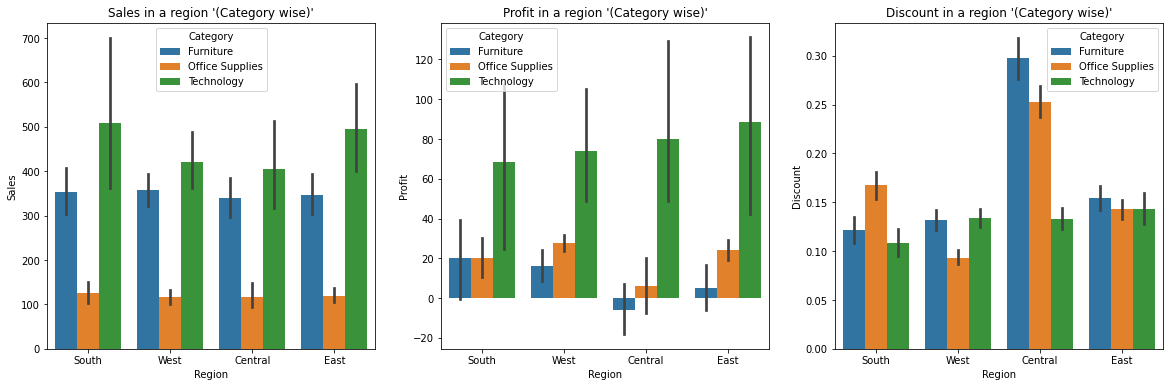

In [19]:
#Sales/ Profit/ Discount in a region "category" wise
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot(x="Region",y="Sales",hue="Category",data=df,ax=ax[0])
ax[0].set_title("Sales in a region '(Category wise)'")
sns.barplot(x="Region",y="Profit",hue="Category",data=df,ax=ax[1])
ax[1].set_title("Profit in a region '(Category wise)'")
sns.barplot(x="Region",y="Discount",hue="Category",data=df,ax=ax[2])
ax[2].set_title("Discount in a region '(Category wise)'")
plt.show()

* It's clear that number of sales of "Office Supplies" is constant but facing loss espically in Central region assuming because of Huge Discount, sames goes with "Furniture" category.
* On the other hand sales of Technology was maximum in both South and East, with increase in profits espically in east region with around 13% discount.

## 5) ANALYSIS OF SALES/ PROFIT/ DISCOUNT IN A SEGMENT, "CATEGORY" WISE

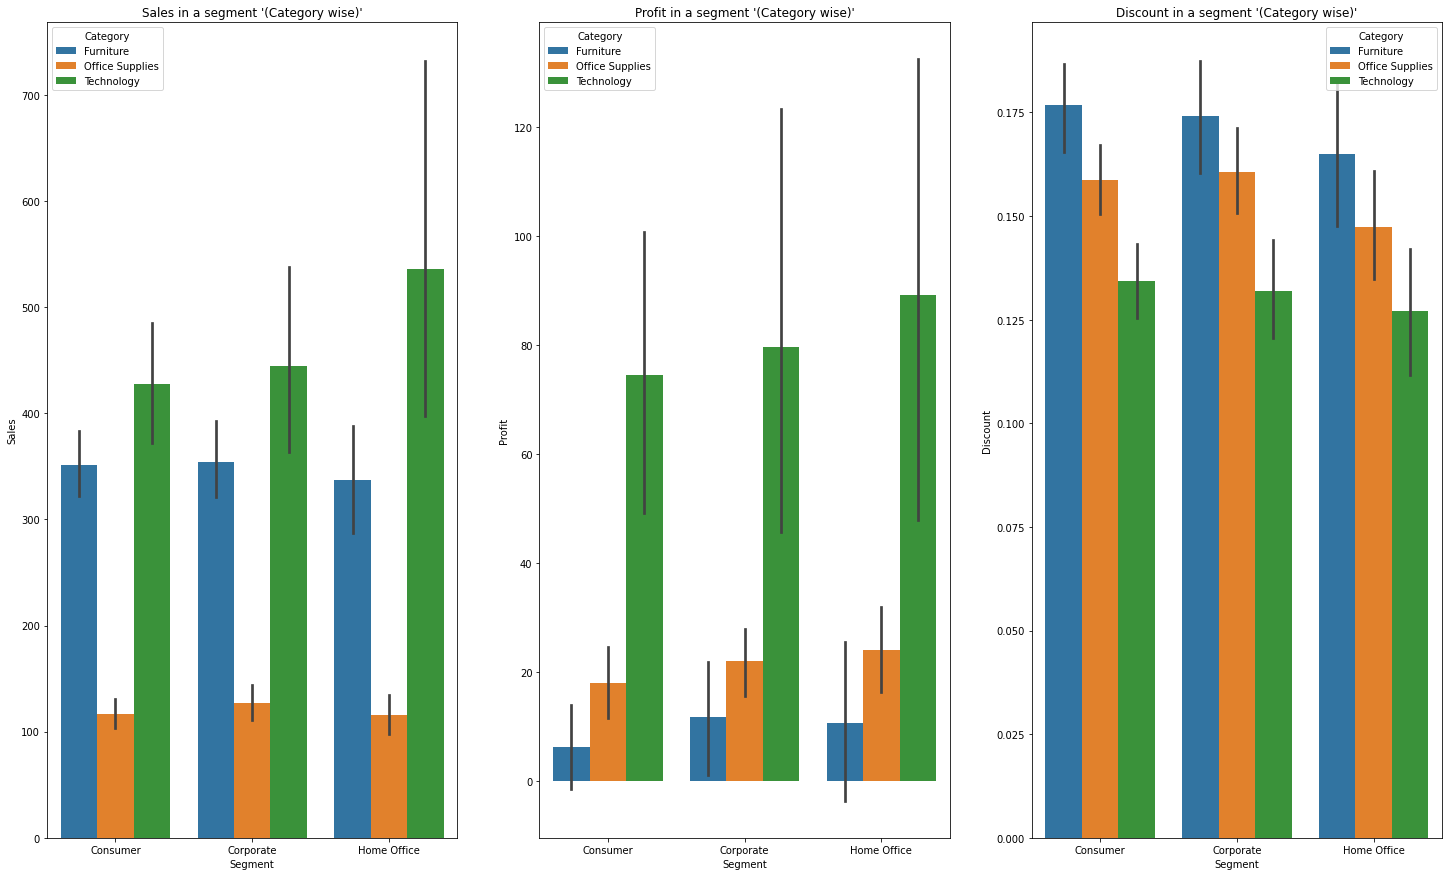

In [20]:
#Sales/ Profit/ Discount in a segment "category" wise
fig,ax=plt.subplots(1,3,figsize=(25,15))
sns.barplot(x="Segment",y="Sales",hue="Category",data=df,ax=ax[0])
ax[0].set_title("Sales in a segment '(Category wise)'")
sns.barplot(x="Segment",y="Profit",hue="Category",data=df,ax=ax[1])
ax[1].set_title("Profit in a segment '(Category wise)'")
sns.barplot(x="Segment",y="Discount",hue="Category",data=df,ax=ax[2])
ax[2].set_title("Discount in a segment '(Category wise)'")
plt.show()

* It's clear that number of sales of "Office Supplies" is constant with least profit by connsumer segment because of Huge Discount of around 16% compared to Technology, sames goes with "Furniture" category with discount around 17%.
* On the other hand sales of Technology was maximum by Home Office segment, with increase in profits with around 13% discount.

## 6) INTERDEPENDENCY IN SALES/ PROFIT/ DISCOUNT

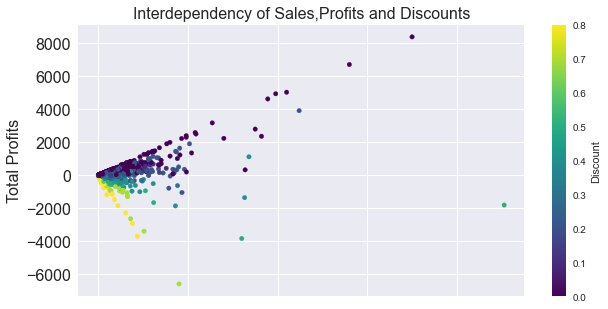

In [21]:
#Interdependency in sales/ profit/ discount
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", c = "Discount", y="Profit",s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()


The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

## 7)ANALYSIS OF SALES/ PROFIT IN EACH CATEGORY

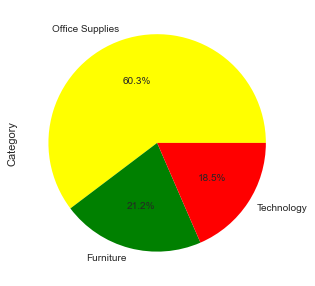

In [22]:
#Number of quantity in each category
plt.figure(figsize=(5,5))
color=["Yellow","Green","Red"]
df['Category'].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=color)
plt.show()

The count of office supplies sold is highest when compared to remaining categories

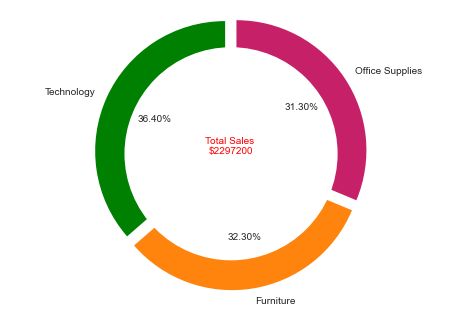

In [23]:
#Sales in each category
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 
Top_category = Top_category[["Sales"]]
total_revenue_category = '$' + str(int(Top_category["Sales"].sum()))
Top_category.reset_index(inplace=True)
colors = ['green','#FE840E','#C62168']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], startangle=90,explode=explode,autopct="%.2f%%")
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Sales \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()

We can see that Category - Technology generated the highest revenue of about 36.4%.

The Total Revenue generated by all the categories - $2297200!

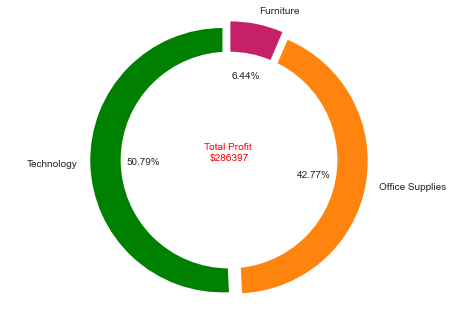

In [24]:
#Profit in each category
Top_category = df.groupby(["Category"]).sum().sort_values("Profit", ascending=False) 
Top_category = Top_category[["Profit"]]
total_revenue_category = '$' + str(int(Top_category["Profit"].sum()))
Top_category.reset_index(inplace=True)
colors = ['green','#FE840E','#C62168']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Profit'], colors = colors, labels=Top_category['Category'], startangle=90,explode=explode,autopct="%.2f%%")
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Profit \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()

We can see that Category - Technology generated the highest profit of about 50.7%.

The Total Revenue generated by all the categories - $286397!

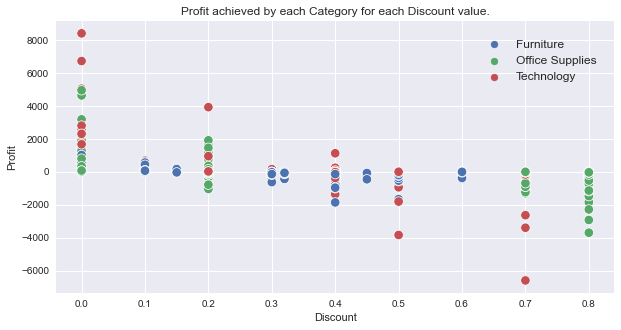

In [25]:
#Sales/ Discount in each Category
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=90)
ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
ax.set_title('Profit achieved by each Category for each Discount value.')
plt.show()

The Office Supplies has maximum loss at 80% and 0% discount.
Furniture and Technology had maximum loss at lower Discount rates

## 8)ANALYSIS OF SALES  IN EACH SUB-CATEGORY

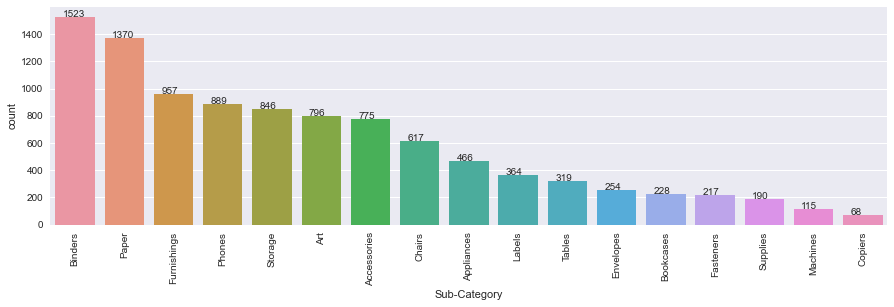

In [26]:
#Number of quantity in each sub-category
plt.figure(figsize=(15,4))
ax=sns.countplot("Sub-Category", data = df,order = df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

The sales of Binders and papers are highest compared to all other sub-categories

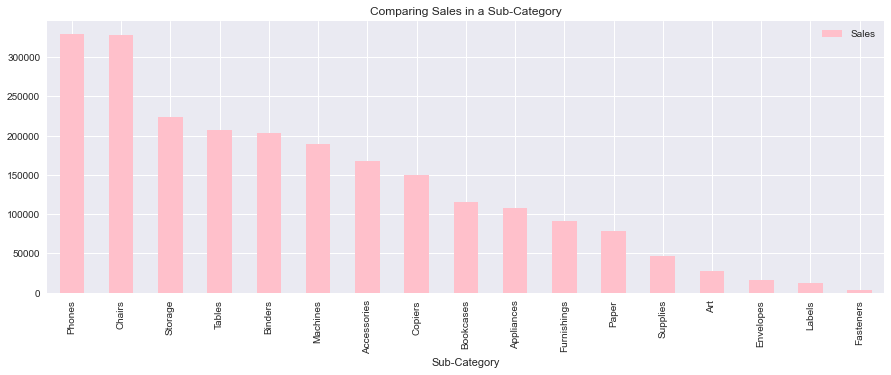

In [27]:
#Sales in each sub-category
cat=df.groupby("Sub-Category")[["Sales"]].sum()
cat.sort_values("Sales",ascending=False,inplace=True)
cat.plot(kind="bar",color=["Pink"],figsize=(15,5))
plt.xticks(rotation=90)
plt.title("Comparing Sales in a Sub-Category")
plt.show()

We can see that Sub-Category - Phones(Technology) and Chairs(Furniture) generated the highest revenue.

The Total Revenue generated by all the categories - $2297200!

## 9) ANALYSIS OF SALES/ PROFIT/ DISCOUNT STATE WISE

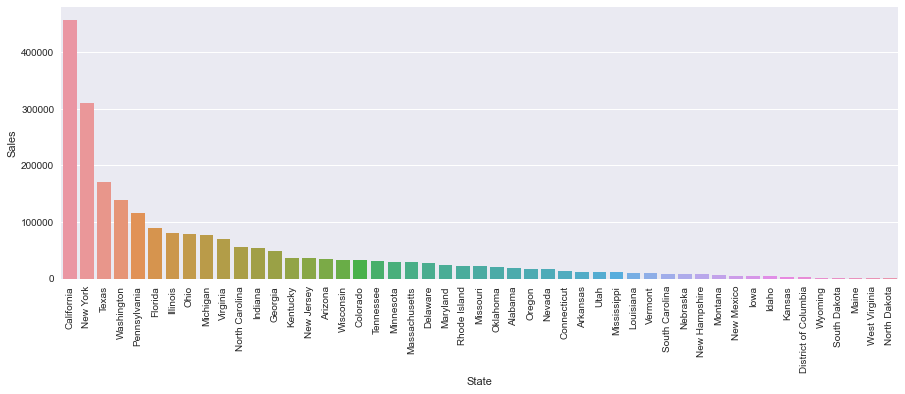

In [28]:
#State wise sales
data_state= df.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

California and New York has highest sales followed by Texas
Maine , West Virgina and North Dakota has lowest sales

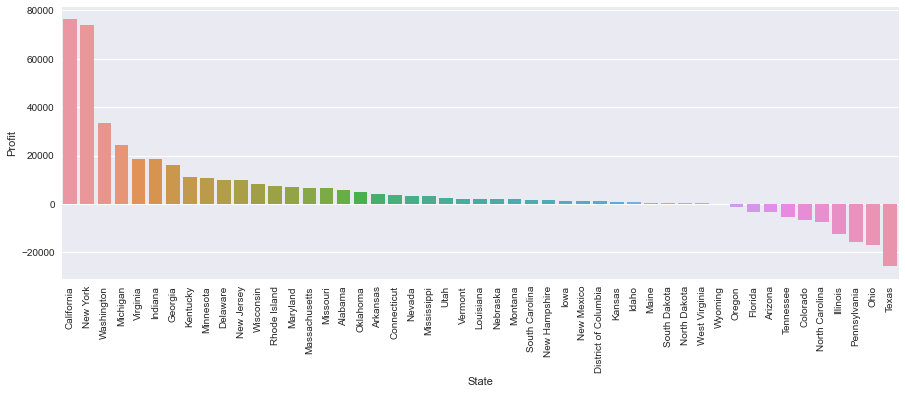

In [29]:
#State wise Profit
data_state= df.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

California has highest profits as well as sales followed by New York.
In some states the profits are in negative.

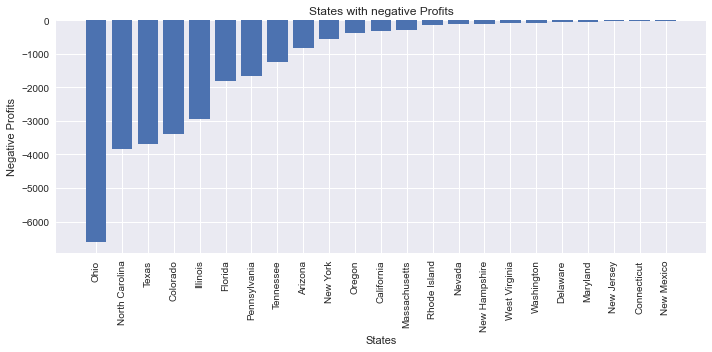

In [30]:
state_low_Profit=df.loc[df.Profit < 0]
state_low_Profit=state_low_Profit.sort_values("Profit")

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(state_low_Profit['State'],state_low_Profit['Profit']) 
ax.set_title(label="States with negative Profits")
ax.set_ylabel('Negative Profits')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.tight_layout()

Ohio has more than $6000 loss in profits .
In total there are 23 states which are in losses.

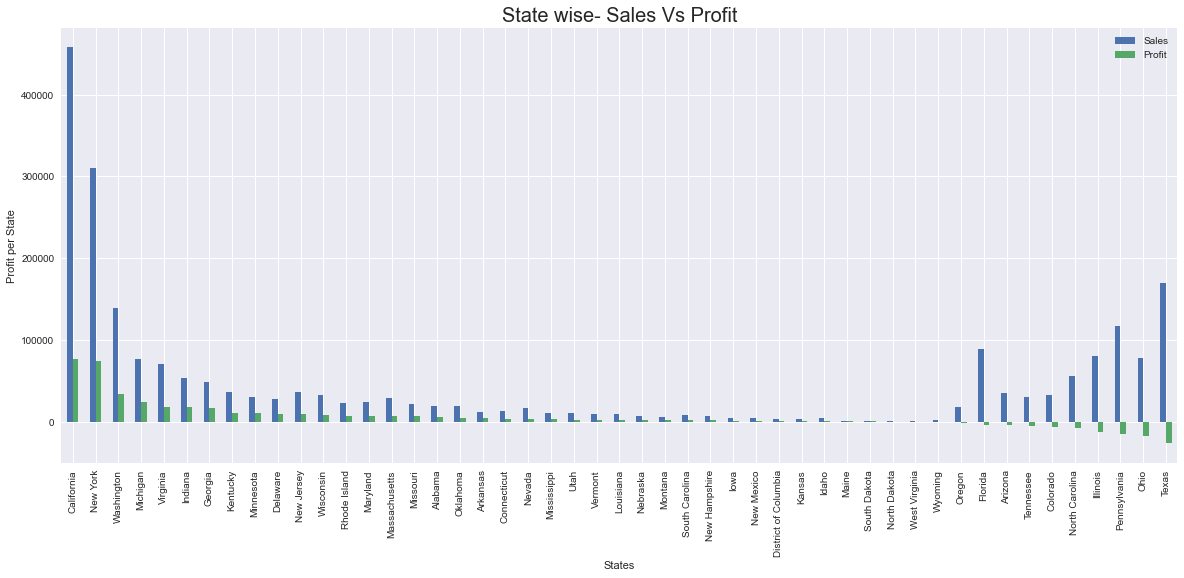

In [31]:
#State wise sales vs profit
data_state= df.groupby(['State'])[['Sales', 'Profit']].sum()
data_state.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.title('State wise- Sales Vs Profit', fontsize = 20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

The relation between sales and profits is not always linear. In some states , we can see the sales are in peak but the profits are not.

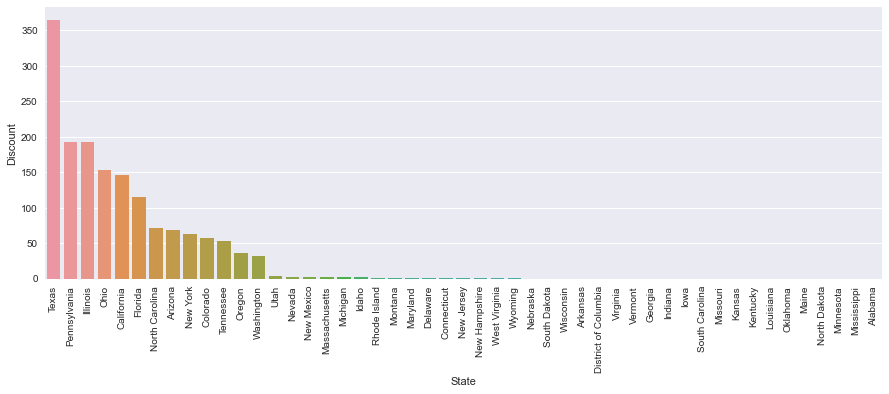

In [32]:
#State wise Discount
data_state= df.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Discount', data = data_state)
plt.show()

Maximum discount is provided in Texas where profits are in negative.
Similar is happening with Ohio, illinous

In [33]:
ps.scatter(data_frame=df, x='State', y='Sales', size='Sales', color='Category')

We can observe that Florida has maximun sales in technology followed by Indiana in technology.

In [34]:
ps.scatter(data_frame=df, x='State', y='Sales', size='Sales', color='Segment')

We can observe that Florida has maximun sales in "Home Office" followed by Indiana in Corporate Segment.

## OBSERVATIONS

## Weak areas where we can work to make more profit.

* Profits and Sales are not Linear in most of the states.
* Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.
* Central region needs to be given more attention.
* Machines and supplies are having less profit and are a loss making sub-category.
* Furnitures are not providing much profit margin with increase in discount.
* Higher discounts are not of much use, the profit are in negative and even the sales are having downtrend after 60% discount.
* The Office Supplies has maximum loss at 80% discount.
* In segements, Standard Class has less profit with low number of sales.
* Even thought Technology gives maximum profit but if the discounts are 70% this will lead to huge loss.
* In central region, Office supplies and Furniture categories facing huge loss with increase in Discounts, similarly in consumer segments also.

## What all business problems you can derive by exploring the data

### How to maximise the profits along with sales improvement?

* Technology gives more profit with maximum sales and compared to furniture category.
* Profits can be maximised if the Ship mode is 'Same day'.
* Western region has more profit margins with increase in sales, by analysing the marketing stratergies the profit of other regions can be increased.
* Discount less than or equal to 50% is having highest sales and profit marging.
* Provide optimal Discount to Technology and Furniture to attract much customers
* In Segments, Home-office has High Profit & sales, suggest to promote more for higher profits.
* In East region, Technology category has maximum sales with huge profit and discount around 13%.
* Florida makes maximum sales in Home-Office segment espically in Technology category followed by Indiana in Corperate segment.